## 분류 모델 평가 지표

#### 1. 혼동 행렬 (Confusion Matrix)
- 혼동 행렬은 예측 결과와 실제 결과를 비교하여 TP, TN, FP, FN의 수를 보여주는 행렬이다. 
- 혼동행렬을 이용해 다양한 평가지표(정확도, 재현률, 정밀도, F1 점수, AUC 점수)를 계산할 수 있다.

![](https://velog.velcdn.com/images/newnew_daddy/post/783fb20d-ef25-4e71-b9fd-fec02eca34f6/image.png)

![](https://velog.velcdn.com/images/newnew_daddy/post/b9af8b40-695e-4df1-91fe-7506ca494f16/image.png)

- True Positive (TP): 실제 양성을 정확히 예측한 경우
- True Negative (TN): 실제 음성을 정확히 예측한 경우
- False Positive (FP): 실제는 음성인데 양성으로 잘못 예측한 경우 (Type I Error)
- False Negative (FN): 실제는 양성인데 음성으로 잘못 예측한 경우 (Type II Error)

![](https://velog.velcdn.com/images/newnew_daddy/post/fbfc9632-00ce-4dd1-bad9-9527af3273aa/image.png)

#### 2. 정확도 (Accuracy)
- 정확도는 전체 예측 중에서 정확하게 예측한 비율
$$
\text{정확도} = \frac{TP+TN}{TP+TN+FP+FN}
$$

#### 3. 정밀도 (Precision)
- Positive(양성)으로 예측한 것 중 실제 Positive(양성)인 비율
- **PPV**(Positive Predictive Value) 라고도 한다.
- ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 암 환자로 예측한 사람 중 실제 암 환자의 비율
$$
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

#### 4. 재현율/민감도 (Recall)
- 실제 Positive(양성)인 것 중에 Positive(양성)로 예측한 것의 비율
- **TPR**(True Positive Rate) 이라고도 한다.
- ex) 스팸 메일 중 스팸메일로 예측한 비율. 실제 암 환자들 중 암 환자로 예측한 비율
$$
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

#### 5. 특이도 (Specificity)
- 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
- **TNR**(True Negative Rate) 라고도 한다.
$$
\text{특이도} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

#### 6. 위양성률 (False Positive Rate)
- 실제 음성중 양성으로 잘못 예측 한 비율
- 위양성률 = 1 - 특이도
$$
\text{위양성률} = \cfrac{FP}{TN+FP}
$$

#### 7. F1 점수 (F1 Score)
- F1 점수는 정밀도와 재현율의 조화 평균으로, 두 지표의 균형을 평가한다.
- recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.
$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

## ROC-AUC
#### 1. 개념
- ROC 곡선(Receiver Operating Characteristic Curve)은 TPR(True Positive Rate)과 FPR(False Positive Rate)의 변화 관계를 나타낸 그래프이다.
- AUC(Area Under the Curve)는 ROC 곡선 아래의 면적을 의미하며, 1에 가까울수록 모델의 성능이 좋음을 나타낸다.

#### 2. 설명

![](https://velog.velcdn.com/images/newnew_daddy/post/b2daad43-8e6f-4a31-bd07-1b75212cdab9/image.png)

- **FPR(False Positive Rate-위양성율)**
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    - 실제 Positive를 얼마나 잘 맞추는가
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    - 실제 Negative를 얼마나 잘 맞추는가
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

## 분류 모델 성과 지표 계산 함수 (sklearn.metrics 모듈)

#### 1. confusion_matrix(y 실제값, y 예측값)
- 혼동 행렬 반환
#### 2. recall_score(y 실제값, y 예측값)
- Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
#### 3. precision_score(y 실제값, y 예측값)
- Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
#### 4. f1_score(y 실제값, y 예측값)
- F1 점수 반환 (recall과 precision의 조화 평균값)
#### 5. classification_report(y 실제값, y 예측값)    
- 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

## 로지스틱 회귀 분류 모델에 평가 지표 적용

### 1. 이진 분류 - 유방암 dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report
)

bc = load_breast_cancer()

X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

In [20]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    X, y, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
test_pred = lr.predict(test_input)

In [35]:
# 정확도
acc = accuracy_score(test_target, test_pred)
print(f"Accuracy: {acc:.3f}")
print("-"*50)

# 정밀도
precision = precision_score(test_target, test_pred)
print(f"Precision: {precision:.3f}")
print("-"*50)

# 재현율
recall = recall_score(test_target, test_pred)
print(f"Recall: {recall:.3f}")
print("-"*50)

# F1 점수
f1 = f1_score(test_target, test_pred)
print(f"F1 Score: {f1:.3f}")
print("-"*50)

# 혼동 행렬
cm = confusion_matrix(test_target, test_pred)
print("Confusion Matrix:")
print(cm)
print("-"*50)

# ROC-AUC
auc = roc_auc_score(test_target, test_pred)
print(f"AUC: {auc:.2f}")
print("-"*50)

# 상세 분류 리포트
report = classification_report(test_target, test_pred)
print("Classification Report:")
print(report)

Accuracy: 0.965
--------------------------------------------------
Precision: 0.967
--------------------------------------------------
Recall: 0.978
--------------------------------------------------
F1 Score: 0.972
--------------------------------------------------
Confusion Matrix:
[[51  3]
 [ 2 87]]
--------------------------------------------------
AUC: 0.96
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



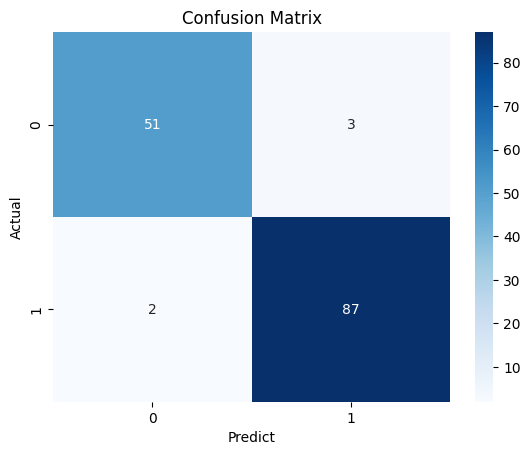

In [41]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

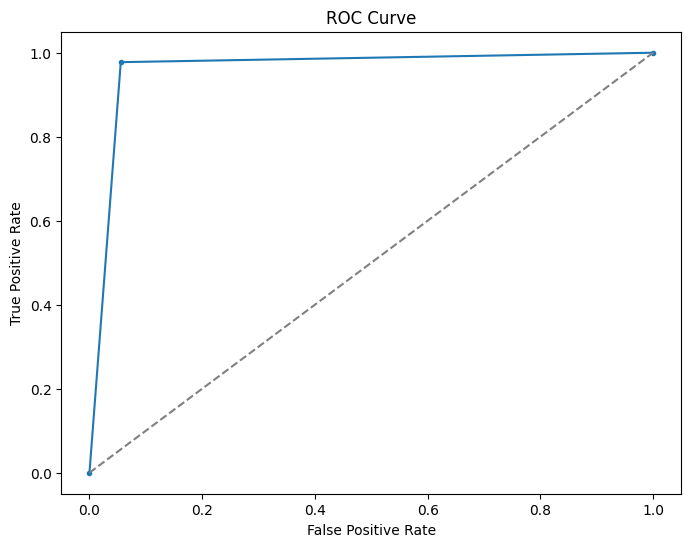

In [36]:
# ROC 커브 그리기
fpr, tpr, thresholds = roc_curve(test_target, test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### 2. 다중 분류 - fish dataset

In [43]:
fish = pd.read_csv('./dataset/fish.csv')

fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [44]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

fish_target = fish['Species'].to_numpy()

In [45]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [47]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

test_pred = lr.predict(test_scaled)

In [53]:
# 정확도
acc = accuracy_score(test_target, test_pred)
print(f"Accuracy: {acc:.3f}")
print("-"*50)

# 혼동 행렬
cm = confusion_matrix(test_target, test_pred)
print("Confusion Matrix:")
print(cm)
print("-"*50)

# 상세 분류 리포트
report = classification_report(test_target, test_pred)
print("Classification Report:")
print(report)

Accuracy: 0.925
--------------------------------------------------
Confusion Matrix:
[[11  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  1  0  2  0  0]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
      Parkki       1.00      1.00      1.00         2
       Perch       0.92      1.00      0.96        12
        Pike       1.00      1.00      1.00         4
       Roach       0.60      1.00      0.75         3
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.93        40
   macro avg       0.79      0.86      0.82        40
weighted avg       0.87      0.93      0.89        40



/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

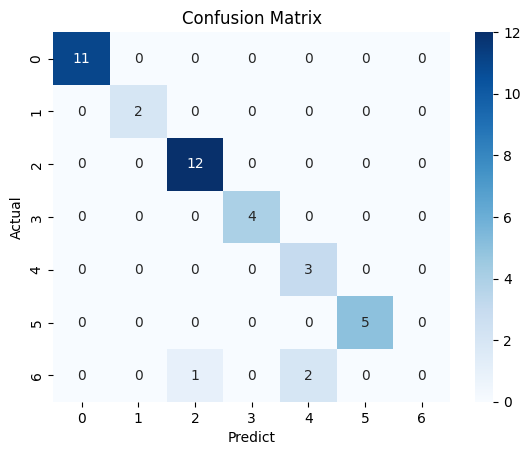

In [52]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()